In [3]:
import pandas as pd

In [4]:
df_spring_2025 = pd.read_csv("./data/Dataset Generation (Spring 2025) (Responses) - Form Responses 1.csv")
df_fall_2025 = pd.read_excel("./data/Dataset Generation Fall2025 (Responses).xlsx")
df_fall_2024 = pd.read_csv("./data/Dataset Generation (2024) (Responses) - Form Responses 1.csv")
df_max_fall_2023 = pd.read_csv("./data/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
df_fardina_fall_2023 = pd.read_csv("./data/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

# Exploratory Analysis

In [5]:
print("There aren't really any irrelevant data columns.")
df_fall_2025.columns

There aren't really any irrelevant data columns.


Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...', 'Do you attend church?',
       'Do your parents attend church?', 'Do you watch sports?',
       'Do your parents watch sports?', 'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk 

In [6]:
df_fall_2025.dtypes

Timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               datetime64[ns]
What year are you?                                                                                                                                                               

In [7]:
print(len(df_fall_2025))
print("There are 169 responses.")

169
There are 169 responses.


In [8]:
df_fall_2025 = df_fall_2025.drop_duplicates()
print(len(df_fall_2025))
print("There are no duplicate rows.")

169
There are no duplicate rows.


In [9]:
print(True in list(df_fall_2025.isna().all(axis=1)))
print("None of the rows had all columns missing.")

False
None of the rows had all columns missing.


In [10]:
print(True in list(df_fall_2025.isna().any(axis=1)))
print("There is at least one row with a missing value.")
for idx, item in enumerate(list(df_fall_2025.isna().any(axis=1))):
    if item == True:
        print(idx)
# print(df_fall_2025.iloc[0])
print("The missing values only appear in the first row, and they start on column 16 and later (uncomment to see row 0's response for all columns).")
print("I tried to find a similar row with features besides the timestamp, grade, and age, in order to do hot deck imputation but was unable to find any rows.")
print("I'll replace this NA with the mode, after I clean up weird outliers, wrong values, scaling issues, and dtypes for that too (there aren't these problems lowk).")

True
There is at least one row with a missing value.
0
The missing values only appear in the first row, and they start on column 16 and later (uncomment to see row 0's response for all columns).
I tried to find a similar row with features besides the timestamp, grade, and age, in order to do hot deck imputation but was unable to find any rows.
I'll replace this NA with the mode, after I clean up weird outliers, wrong values, scaling issues, and dtypes for that too (there aren't these problems lowk).


Most people submitted the form right when it dropped on September 29th, and again for the next class period I'm guessing. Then for the 30th's class as well, I'm guessing.
Someone submitted like on the 14th, outlier; this is acceptable though.


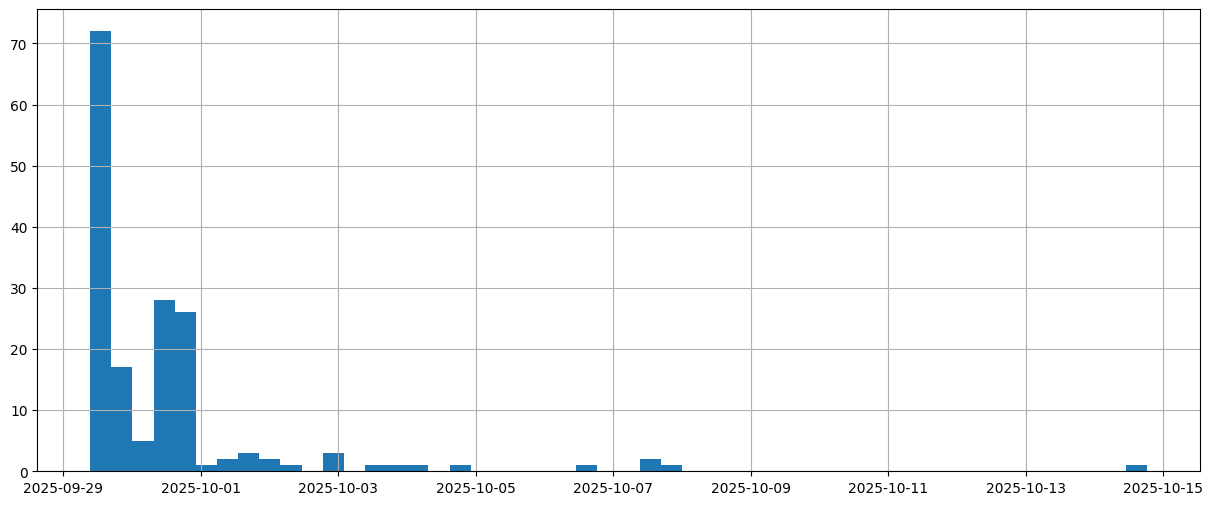

In [11]:
df_fall_2025["Timestamp"].hist(figsize=(15, 6), bins=50)
print("Most people submitted the form right when it dropped on September 29th, and again for the next class period I'm guessing. Then for the 30th's class as well, I'm guessing.")
print("Someone submitted like on the 14th, outlier; this is acceptable though.")

In [12]:
print(df_fall_2025.groupby("What year are you?").size())
print("Most people are juniors, some are sophomores or seniors, and barely any were other (freshman).")

What year are you?
Junior      119
Other         1
Senior       23
Sophmore     26
dtype: int64
Most people are juniors, some are sophomores or seniors, and barely any were other (freshman).


How old are you?
18      4
19     29
20     90
21     30
22     12
23      1
24      1
27      1
50+     1
dtype: int64
Most people are 19, 20, 21, or 22. Barely any were 18, 23, 24, 27, or 50+.
The person who was 50+ is an outlier, but this should be okay.


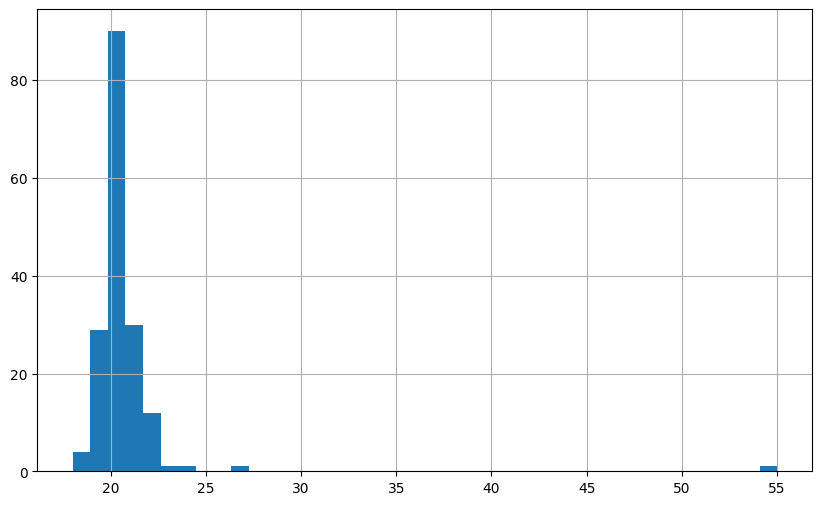

In [13]:
print(df_fall_2025.groupby("How old are you?").size())
df_fall_2025_age_distribution = df_fall_2025["How old are you?"].apply(lambda x: 55 if str(x) == "50+" else x).astype(int)
df_fall_2025_age_distribution.hist(bins=40, figsize=(10, 6))
print("Most people are 19, 20, 21, or 22. Barely any were 18, 23, 24, 27, or 50+.")
print("The person who was 50+ is an outlier, but this should be okay.")

In [14]:
print(df_fall_2025.groupby("You could describe the adults you grew up with as...").size())

You could describe the adults you grew up with as...
Don't know / It's complicated    17
Mildly conservative              36
Mildly liberal                   52
Neutral                          36
Strongly conservative            14
Strongly liberal                 14
dtype: int64


In [15]:
print(df_fall_2025.groupby("You could describe yourself as...").size())

You could describe yourself as...
Don't know / It's complicated     5
Mildly conservative              17
Mildly liberal                   60
Neutral                          38
Strongly conservative             5
Strongly liberal                 44
dtype: int64


In [16]:
print(df_fall_2025.groupby("Do you attend church?").size())

Do you attend church?
Frequently     14
Never         141
Often          14
dtype: int64


In [17]:
print(df_fall_2025.groupby("Do your parents attend church?").size())

Do your parents attend church?
Frequently     27
Never         122
Often          20
dtype: int64


In [18]:
print(df_fall_2025.groupby("Do you watch sports?").size())

Do you watch sports?
Frequently    56
Never         62
Often         51
dtype: int64


In [19]:
print(df_fall_2025.groupby("Do your parents watch sports?").size())

Do your parents watch sports?
Frequently    39
Never         63
Often         67
dtype: int64


In [20]:
print(df_fall_2025.groupby("What bests represents your gender?").size())

What bests represents your gender?
Female     43
Male      126
dtype: int64


In [21]:
print(df_fall_2025.groupby("My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?").size())

My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
Mildly a jerk      86
Not a jerk         78
Strongly a jerk     5
dtype: int64


In [22]:
print(df_fall_2025.groupby("My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?").size())

My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
Mildly a jerk      62
Not a jerk         79
Strongly a jerk    28
dtype: int64


In [23]:
print(df_fall_2025.groupby("I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?").size())

I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?
Mildly a jerk      76
Not a jerk         56
Strongly a jerk    37
dtype: int64


In [24]:
print(df_fall_2025.groupby("My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.").size())

My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.
Mildly a jerk      60
Not a jerk         74
Strongly a jerk    35
dtype: int64


In [25]:
print(df_fall_2025.groupby("I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?").size())

I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?
Mildly a jerk      51
Not a jerk         68
Strongly a jerk    50
dtype: int64


In [26]:
print(df_fall_2025.groupby("My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?").size())

My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?
Mildly a jerk       40
Not a jerk         117
Strongly a jerk     12
dtype: int64


In [27]:
print(df_fall_2025.groupby("My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?").size())

My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?
Mildly a jerk      58
Not a jerk         27
Strongly a jerk    83
dtype: int64


In [28]:
print(df_fall_2025.groupby("I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?").size())

I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?
Mildly a jerk      50
Not a jerk         93
Strongly a jerk    25
dtype: int64


In [29]:
print(df_fall_2025.groupby("I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?").size())

I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?
Mildly a jerk      51
Not a jerk         99
Strongly a jerk    18
dtype: int64


In [30]:
print(df_fall_2025.groupby("One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?").size())

One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?
Mildly a jerk      69
Not a jerk         58
Strongly a jerk    41
dtype: int64


In [31]:
print(df_fall_2025.groupby("I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?").size())

I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?
Mildly a jerk       49
Not a jerk         100
Strongly a jerk     19
dtype: int64


In [32]:
print(df_fall_2025.groupby("\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?").size())

\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?
Mildly a jerk       45
Not a jerk         108
Strongly a jerk     15
dtype: int64


In [33]:
print(df_fall_2025.groupby("My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?").size())

My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?
Mildly a jerk      57
Not a jerk         15
Strongly a jerk    96
dtype: int64


In [34]:
print(df_fall_2025.groupby("My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?").size())

My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?
Mildly a jerk      59
Not a jerk         27
Strongly a jerk    82
dtype: int64


In [35]:
df_fall_2025["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn\'t comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn\'t mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].fillna("Strongly a jerk")
df_fall_2025["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child\'s mother to make sure she\'s paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn\'t show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["One of my children wants to go to an expensive school to become a dentist. I told them I\'d be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn\'t pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"].fillna("Mildly a jerk")
df_fall_2025["I was in a conflict with my mother-in-law\'s boyfriend, in which I made a snide comment about he\'s never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he\'d sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn\'t be around him anymore. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["\nSome of my relatives refuse to come to my wedding, since they don\'t approve of our \'lifestyle\'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].fillna("Not a jerk")
df_fall_2025["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"].fillna("Strongly a jerk")
df_fall_2025["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn\'t look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn\'t be in the wedding party. Am I a jerk?"].fillna("Strongly a jerk")

0      Strongly a jerk
1      Strongly a jerk
2      Strongly a jerk
3      Strongly a jerk
4      Strongly a jerk
            ...       
164    Strongly a jerk
165         Not a jerk
166      Mildly a jerk
167    Strongly a jerk
168      Mildly a jerk
Name: My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?, Length: 169, dtype: object

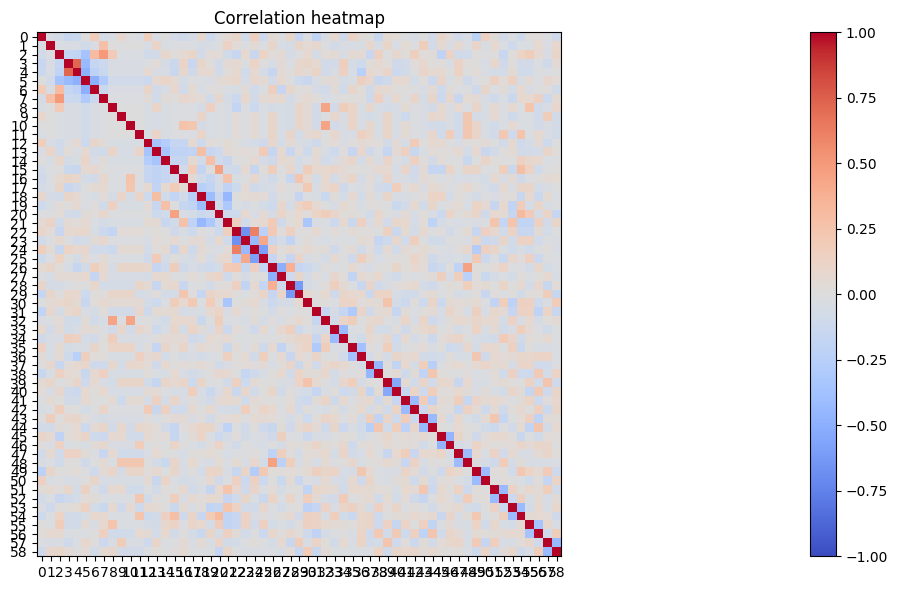

In [36]:
import matplotlib.pyplot as plt
import numpy as np

df_fall_2025_one_hot_encoded = pd.get_dummies(df_fall_2025, drop_first = True)
corr_mat = df_fall_2025_one_hot_encoded.corr()

fig, ax = plt.subplots(figsize=(50, 6))
ax.set_xticks(np.arange(len(corr_mat.columns)))
ax.set_yticks(np.arange(len(corr_mat.columns)))
plt.colorbar(ax.imshow(corr_mat, cmap="coolwarm", vmin=-1, vmax=1), ax=ax)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

# Testing theories

In [37]:

from scipy import stats

print("There are not really any colinear variables in our one-hot encoded dataset.")
print("The only thing is questions 3 and 4, 'You would describe the adults you grew up with as...' and 'You would describe yourself as...' are pretty similar.")
print("These two variables being similar is to be expected.")
print("We can use a chi-squared test to test whether they are actually independent.")
table = pd.crosstab(df_fall_2025["You could describe the adults you grew up with as..."], df_fall_2025["You could describe yourself as..."])
chi2, p, dof, expected = stats.chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's political beliefs are influenced by their parents' political beliefs.")
print("Again, this is expected because there are MANY confounding variables that affect both of these variables.")

There are not really any colinear variables in our one-hot encoded dataset.
The only thing is questions 3 and 4, 'You would describe the adults you grew up with as...' and 'You would describe yourself as...' are pretty similar.
These two variables being similar is to be expected.
We can use a chi-squared test to test whether they are actually independent.
Chi-square statistic: 111.30622569867927
p-value: 7.331147378552827e-13
Degrees of freedom: 25
Expected frequencies:
 [[ 0.50295858  1.71005917  6.03550296  3.82248521  0.50295858  4.4260355 ]
 [ 1.06508876  3.62130178 12.78106509  8.09467456  1.06508876  9.37278107]
 [ 1.53846154  5.23076923 18.46153846 11.69230769  1.53846154 13.53846154]
 [ 1.06508876  3.62130178 12.78106509  8.09467456  1.06508876  9.37278107]
 [ 0.41420118  1.40828402  4.9704142   3.14792899  0.41420118  3.64497041]
 [ 0.41420118  1.40828402  4.9704142   3.14792899  0.41420118  3.64497041]]
Since our resulting p-value is <= 0.05, we reject the null hypothesis tha

In [38]:
print("I would also guess that parents' attending church affects children attending church, as well as parents' watching sports affects children watching sports.")
table = pd.crosstab(df_fall_2025["Do you attend church?"], df_fall_2025["Do your parents attend church?"])
chi2, p, dof, expected = stats.chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's attending church or not is influenced by their parents' attending church or not.")
table = pd.crosstab(df_fall_2025["Do you watch sports?"], df_fall_2025["Do your parents watch sports?"])
chi2, p, dof, expected = stats.chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's watching sports or not is influenced by their parents' watching sports or not.")

I would also guess that parents' attending church affects children attending church, as well as parents' watching sports affects children watching sports.
Chi-square statistic: 97.87436230806189
p-value: 2.7878942017491914e-20
Degrees of freedom: 4
Expected frequencies:
 [[  2.23668639  10.10650888   1.65680473]
 [ 22.52662722 101.78698225  16.68639053]
 [  2.23668639  10.10650888   1.65680473]]
Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's attending church or not is influenced by their parents' attending church or not.
Chi-square statistic: 28.799932763989883
p-value: 8.584081523242817e-06
Degrees of freedom: 4
Expected frequencies:
 [[12.92307692 20.87573964 22.20118343]
 [14.30769231 23.11242604 24.57988166]
 [11.76923077 19.01183432 20.21893491]]
Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's watching sports or not is influenced by their parents' watching sports or not.


In [39]:
print("I wonder if a person's description of themself is affected by whether they attend church, whether they watch sports, or their gender.")
table1 = pd.crosstab(df_fall_2025["Do you attend church?"], df_fall_2025["You could describe yourself as..."])
table2 = pd.crosstab(df_fall_2025["Do you watch sports?"], df_fall_2025["You could describe yourself as..."])
table3 = pd.crosstab(df_fall_2025["What bests represents your gender?"], df_fall_2025["You could describe yourself as..."])
_, p1, _, _ = stats.chi2_contingency(table1)
_, p2, _, _ = stats.chi2_contingency(table2)
_, p3, _, _ = stats.chi2_contingency(table3)
print("Church and description of oneself p value: ", p1)
print("Sports and description of oneself p value: ", p2)
print("Gender and description of oneself p value: ", p3)
print("This is interesting, attending church and watching sports don't impact nearly as much as one's gender when it comes to describing how liberal or conservative they are.")
print("We are able to reject the null hypothesis that one's gender does not affect their description of themself.")

I wonder if a person's description of themself is affected by whether they attend church, whether they watch sports, or their gender.
Church and description of oneself p value:  0.3806124861555718
Sports and description of oneself p value:  0.16446717356198765
Gender and description of oneself p value:  8.619818401502153e-05
This is interesting, attending church and watching sports don't impact nearly as much as one's gender when it comes to describing how liberal or conservative they are.
We are able to reject the null hypothesis that one's gender does not affect their description of themself.


In [40]:
print("I also want to see what ordinal question responses that a person's gender affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["What bests represents your gender?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("We can reject the null hypothesis for the following columns:")
print("Lost cat, conflict with mother-in-law's boyfriend, relative refuse to come to LGBTQ wedding, sister being bridesmaid at wedding.")

I also want to see what ordinal question responses that a person's gender affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.9605165777544047
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-value: 0.314

In [41]:
print("I also want to see what ordinal question responses that a person's age affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["How old are you?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("We can reject the null hypothesis for the following columns:")
print("Girlfriend's ibuprofen, trust fund kid, child with negligent mother.")

I also want to see what ordinal question responses that a person's age affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 3.833642303488909e-09
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-value: 0.614

In [42]:
print("I also want to see what ordinal question responses that a person's year in school affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["What year are you?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("This was weaker correlation than a person's age: we failed to reject the null hypotheses for all columns in the dataset.")

I also want to see what ordinal question responses that a person's year in school affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.8079592424268096
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-valu

In [43]:
print("I also want to see if someone watching sports or someone attending church affects their ordinal responses to the jerk questions.")
print("Church correlation to jerk questions:")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["Do you attend church?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("\n\n")
print("Sports correlation to jerk questions:")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["Do you watch sports?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("\n\n")
print("Self description correlation to jerk questions:")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["You could describe yourself as..."], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("Church doesn't directly correlate to any of the ordinal jerk questions.")
print("Sports directly correlates to the ordinal jerk question relating to the negligent mother and the investigator and the court.")
print("Self description directly correlates to the ordinal jerk question relating to the relatives refusing to come to the LGBTQ wedding.")

I also want to see if someone watching sports or someone attending church affects their ordinal responses to the jerk questions.
Church correlation to jerk questions:
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.7489664154691054
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far mor

### Effects of priming

TONS of ibuprofen primes the reader to subconsciously already take the side or perspective of the narrator instead of a fair view.
I want to compare the effects of this question to one that HASN'T been primed.


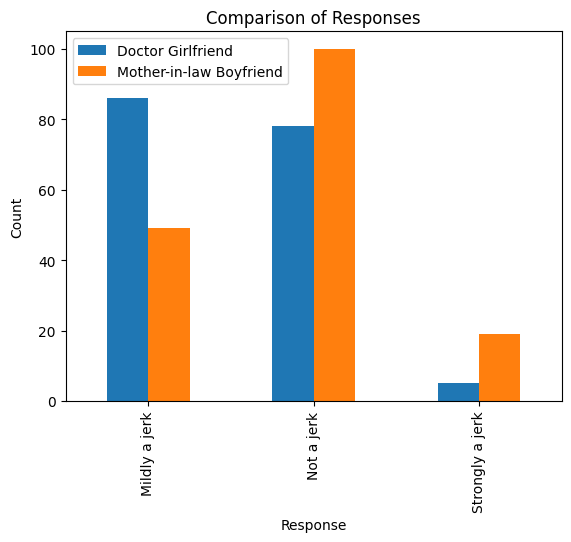

In [44]:
print("TONS of ibuprofen primes the reader to subconsciously already take the side or perspective of the narrator instead of a fair view.")
print("I want to compare the effects of this question to one that HASN'T been primed.")

counts = pd.DataFrame({
    "Doctor Girlfriend": df_fall_2025["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?"].value_counts(),
    "Mother-in-law Boyfriend": df_fall_2025["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].value_counts()
})
counts.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Comparison of Responses")
plt.show()

### Household vs individual view effects


In [ ]:
print("I also want to see the correlation between household view and the answer to the ordinal jerk questions rather than the correlation between individual view and ordinal jerk answers.")
df_fall_2025["Household Political Views"] = df_fall_2025["You could describe yourself as..."] + " / " + df_fall_2025["You could describe the adults you grew up with as..."]
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["Household Political Views"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    print("p-value:", p)
print("Wife and relatives are affected.")

I also want to see the correlation between household view and the answer to the ordinal jerk questions rather than the correlation between individual view and ordinal jerk answers.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.17889692855762138
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he dese

### I wonder if my results are the same for genders swapped too

Checking:

Describing adults you grew up with as... vs. Describing yourself as... --> Adults' political beliefs & Children political beliefs

Parents attending church vs. children attending church --> Parents attending church & Children attending church

Parents watching sports vs. children watching sports --> Parents watching sports & Children watching sports

Children attending church vs. Describing yourself as... --> Nothing

Children watching sports vs. Describing yourself as... --> Nothing

Gender vs. Describing yourself as... --> Gender & Describing yourself as...

Gender vs. Ordinal jerk questions --> Gender & Lost cat, Gender & Conflict w/ Mother-in-Law's boyfriend, Gender & Relatives refusing LGBTQ wedding, Gender & Sister being bridesmaid at wedding

Age vs. Ordinal jerk questions --> Age & Girlfriend's ibuprofen, Age & Trust fund kid, Age & Negligent mother

Year in school vs. Ordinal jerk questions --> Nothing

Children attending church vs. Ordinal jerk questions --> Nothing

Children watching sports vs. Ordinal jerk questions --> Sports & Negligent mother

Describing yourself as... vs. Ordinal jerk questions --> Self Description & Relatives refusing LGBTQ wedding

In [74]:
table1 = pd.crosstab(df_spring_2025["You could describe yourself as..."], df_spring_2025["You could describe the adults you grew up with as..."])
_, p, _, _ = stats.chi2_contingency(table1)
print("Describe adult vs oneself: ", p)
print("There is no church adults vs children option for spring 2025. The only thing is a column called 'How would you rate your religiousness?'")
print("There is no sports adults vs chidlren option for spring 2025.")
table2 = pd.crosstab(df_spring_2025["You could describe yourself as..."], df_spring_2025["How would you rate your religiousness?"])
_, p2, _, _ = stats.chi2_contingency(table2)
print("Religiousness vs describing oneself: ", p2)
print("Again, there is no sports column at all.")
table3 = pd.crosstab(df_spring_2025["You could describe yourself as..."], df_spring_2025["What bests represents your gender?"])
_, p3, _, _ = stats.chi2_contingency(table3)
print("Gender vs describing oneself: ", p3)

print("\n\nGender vs. Ordinal jerk questions:")
for i in range(7, len(df_spring_2025.columns)):
    table = pd.crosstab(df_spring_2025["What bests represents your gender?"], df_spring_2025.iloc[:, i])
    _, p4, _, _ = stats.chi2_contingency(table)
    print(f"Column: {list(df_spring_2025.columns)[i]}")
    print("p-value:", p4)

print("\n\nAge vs. Ordinal jerk questions:")
for i in range(7, len(df_spring_2025.columns)):
    table = pd.crosstab(df_spring_2025["How old are you?"], df_spring_2025.iloc[:, i])
    _, p5, _, _ = stats.chi2_contingency(table)
    print(f"Column: {list(df_spring_2025.columns)[i]}")
    print("p-value:", p5)

print("\n\nYear in School vs. Ordinal jerk questions:")
for i in range(7, len(df_spring_2025.columns)):
    table = pd.crosstab(df_spring_2025["What year are you?"], df_spring_2025.iloc[:, i])
    _, p6, _, _ = stats.chi2_contingency(table)
    print(f"Column: {list(df_spring_2025.columns)[i]}")
    print("p-value:", p6)

print("\n\nReligiousness vs. Ordinal jerk questions:")
for i in range(7, len(df_spring_2025.columns)):
    table = pd.crosstab(df_spring_2025["How would you rate your religiousness?"], df_spring_2025.iloc[:, i])
    _, p7, _, _ = stats.chi2_contingency(table)
    print(f"Column: {list(df_spring_2025.columns)[i]}")
    print("p-value:", p7)

print("There is no sports column.")

print("\n\nDescribing oneself vs. Ordinal jerk questions:")
for i in range(7, len(df_spring_2025.columns)):
    table = pd.crosstab(df_spring_2025["You could describe yourself as..."], df_spring_2025.iloc[:, i])
    _, p8, _, _ = stats.chi2_contingency(table)
    print(f"Column: {list(df_spring_2025.columns)[i]}")
    print("p-value:", p8)

print("NGL, this class had more liars when describing themself I guess.")
print("Also, this class' dataset had opposite gender participants in the questions, which could lead to less sympathy.")

Describe adult vs oneself:  0.1772919523645134
There is no church adults vs children option for spring 2025. The only thing is a column called 'How would you rate your religiousness?'
There is no sports adults vs chidlren option for spring 2025.
Religiousness vs describing oneself:  0.0046789559846880015
Again, there is no sports column at all.
Gender vs describing oneself:  1.5121920325684796e-08


Gender vs. Ordinal jerk questions:
Column: My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.002447014947512816
Column: My son is getting married soon. Due to a complicated past, we've only just met recently. We

### Graphs of trends over time
I'm interested describing oneself over the years as well as class statistics over the years

In [52]:
df_fall_2025.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...', 'Do you attend church?',
       'Do your parents attend church?', 'Do you watch sports?',
       'Do your parents watch sports?', 'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk 

In [59]:
df_fall_2024.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [60]:
df_max_fall_2023.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. He

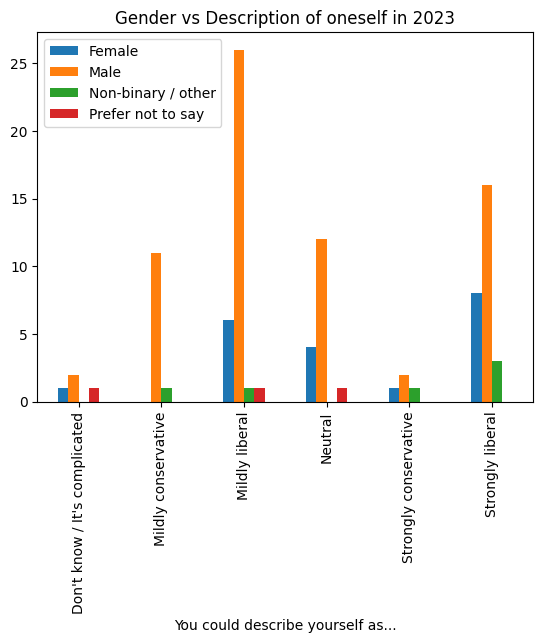

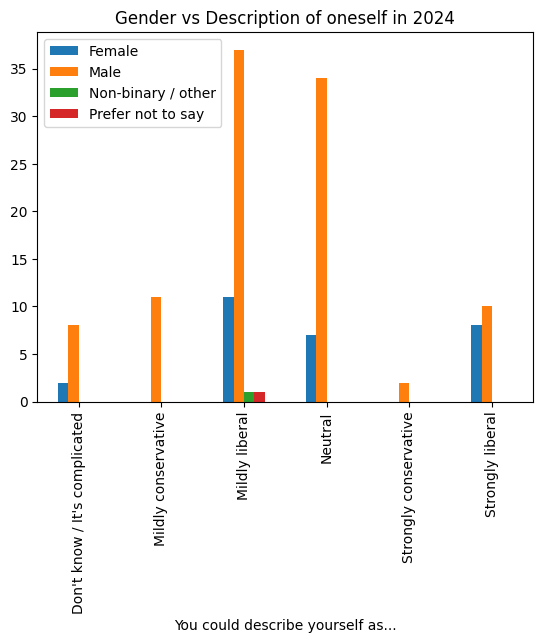

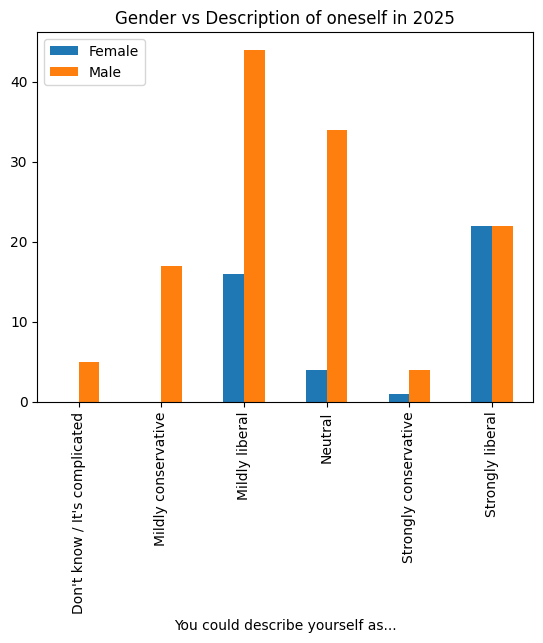

In [85]:
df_max_fall_2023["What bests represents your gender?"] = (
    df_max_fall_2023["What bests represents your gender?"]
    .replace("Famale", "Female")
)

pd.crosstab(df_max_fall_2023["You could describe yourself as..."],
            df_max_fall_2023["What bests represents your gender?"]).plot(kind="bar")
plt.legend(loc = "upper left")
plt.title("Gender vs Description of oneself in 2023")
plt.show()

pd.crosstab(df_fall_2024["You could describe yourself as..."],
            df_fall_2024["What bests represents your gender?"]).plot(kind="bar")
plt.legend(loc = "upper left")
plt.title("Gender vs Description of oneself in 2024")
plt.show()

pd.crosstab(df_fall_2025["You could describe yourself as..."],
            df_fall_2025["What bests represents your gender?"]).plot(kind="bar")
plt.legend(loc = "upper left")
plt.title("Gender vs Description of oneself in 2025")
plt.show()

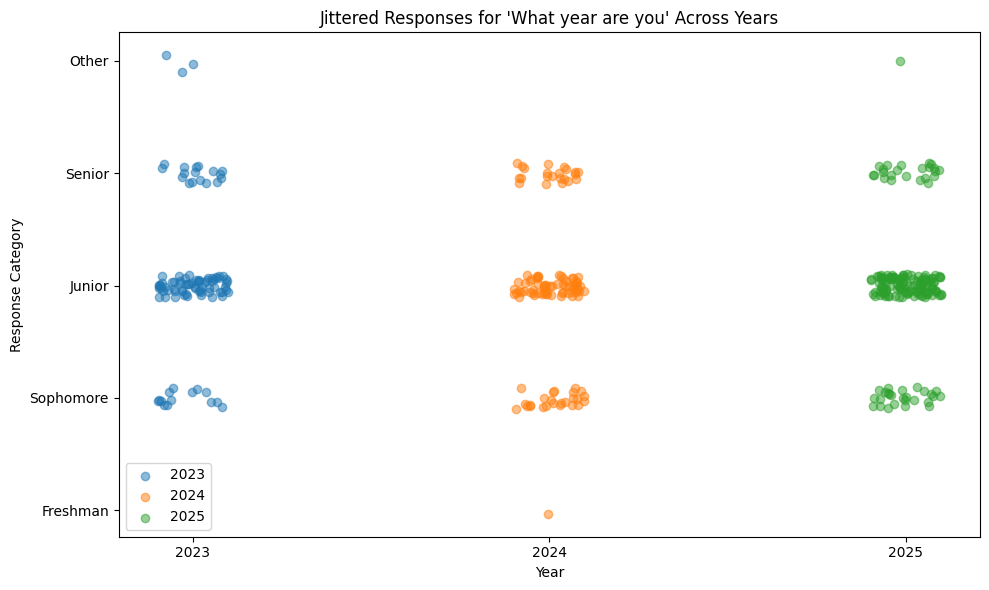

In [93]:
ordered_categories = ["Freshman", "Sophomore", "Junior", "Senior", "Other"]
df_fall_2025.replace("Sophmore", "Sophomore", inplace=True)
df_fall_2024.replace("Sophmore", "Sophomore", inplace=True)
df_max_fall_2023.replace("Sophmore", "Sophomore", inplace=True)
mapping = {cat: i for i, cat in enumerate(ordered_categories)}
codes_2023 = df_max_fall_2023["What year are you?"].map(mapping).dropna()
codes_2024 = df_fall_2024["What year are you?"].map(mapping).dropna()
codes_2025 = df_fall_2025["What year are you?"].map(mapping).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    np.ones(len(codes_2023)) * 2023 + np.random.uniform(-0.1, 0.1, len(codes_2023)), 
    codes_2023 + np.random.uniform(-0.1, 0.1, len(codes_2023)), 
    alpha=0.5, label='2023'
)
plt.scatter(
    np.ones(len(codes_2024)) * 2024 + np.random.uniform(-0.1, 0.1, len(codes_2024)), 
    codes_2024 + np.random.uniform(-0.1, 0.1, len(codes_2024)), 
    alpha=0.5, label='2024'
)
plt.scatter(
    np.ones(len(codes_2025)) * 2025 + np.random.uniform(-0.1, 0.1, len(codes_2025)), 
    codes_2025 + np.random.uniform(-0.1, 0.1, len(codes_2025)), 
    alpha=0.5, label='2025'
)
plt.yticks(range(len(ordered_categories)), ordered_categories)
plt.title(f"Jittered Responses for 'What year are you' Across Years")
plt.xlabel("Year")
plt.xticks([2023, 2024, 2025])
plt.ylabel("Response Category")
plt.legend()
plt.tight_layout()
plt.show()

It doesn't make sense to fillna with the median as we know their year in school too. Hot deck imputation doesn't make sense either as seniors can have different ages, sophomore can too, etc.


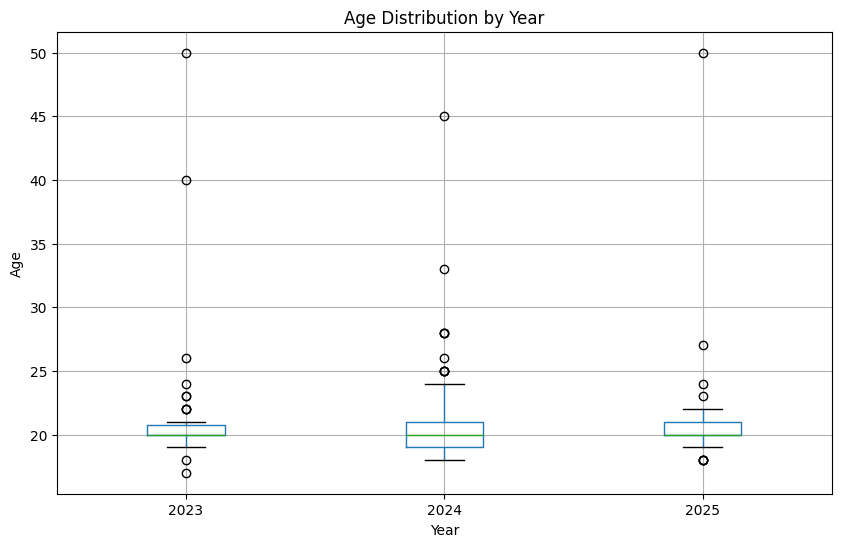

In [82]:
plt.figure(figsize=(10, 6))
print("It doesn't make sense to fillna with the median as we know their year in school too. Hot deck imputation doesn't make sense either as seniors can have different ages, sophomore can too, etc.")
df_ages = pd.DataFrame({
    '2023': df_max_fall_2023["How old are you?"].dropna().replace("50+", "50").astype(int),
    '2024': df_fall_2024["How old are you?"].dropna().astype(int),
    '2025': df_fall_2025["How old are you?"].replace("50+", "50").astype(int)
})
df_ages.boxplot()
plt.title("Age Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()

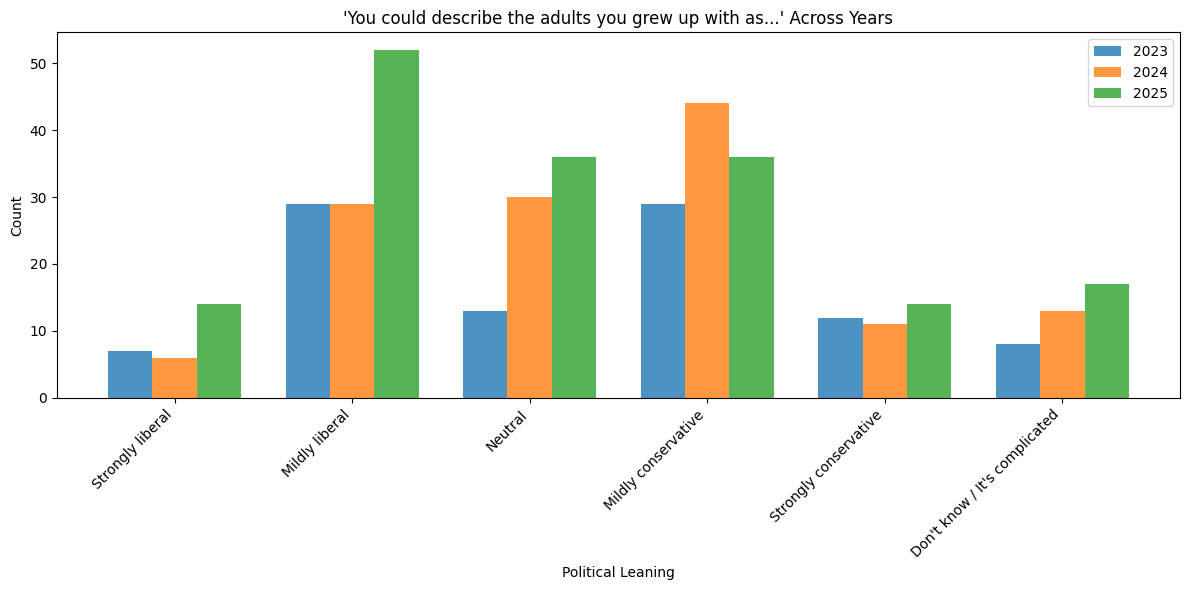

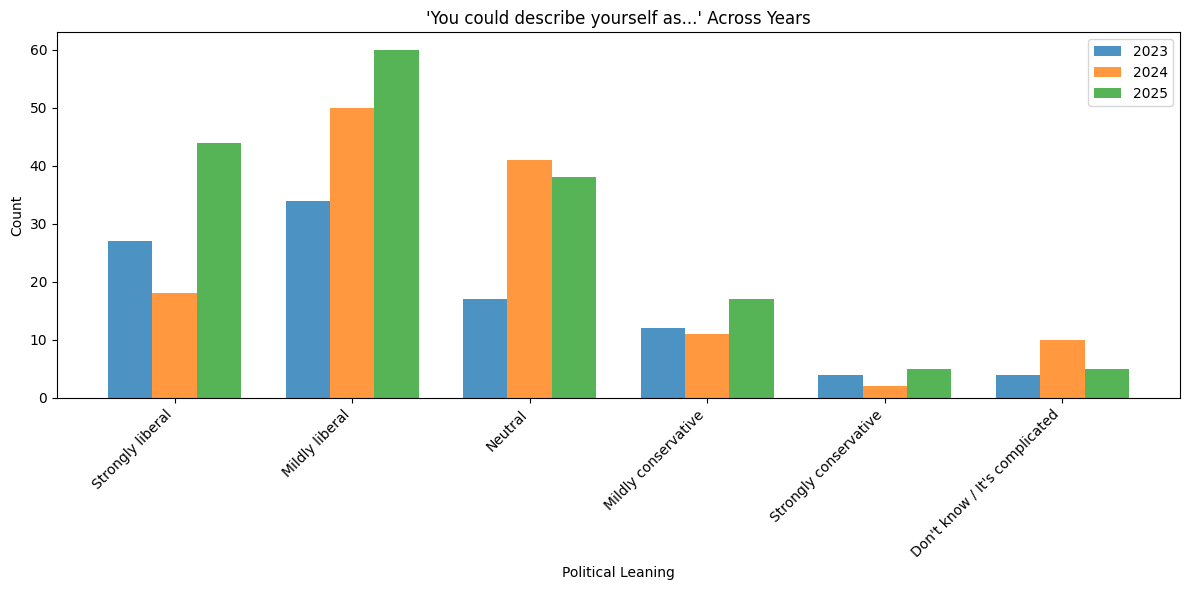

In [88]:
col = "You could describe the adults you grew up with as..."
ordered_categories = ['Strongly liberal', 'Mildly liberal', 'Neutral', 'Mildly conservative', 'Strongly conservative', "Don't know / It's complicated"]
counts_2023 = df_max_fall_2023[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
counts_2024 = df_fall_2024[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
counts_2025 = df_fall_2025[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
x = np.arange(len(ordered_categories))
width = 0.25
plt.figure(figsize=(12, 6))
plt.bar(x - width, counts_2023, width, label='2023', alpha=0.8)
plt.bar(x, counts_2024, width, label='2024', alpha=0.8)
plt.bar(x + width, counts_2025, width, label='2025', alpha=0.8)
plt.xlabel('Political Leaning')
plt.ylabel('Count')
plt.title(f"'{col}' Across Years")
plt.xticks(x, ordered_categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()





col = "You could describe yourself as..."
ordered_categories = ['Strongly liberal', 'Mildly liberal', 'Neutral', 'Mildly conservative', 'Strongly conservative', "Don't know / It's complicated"]
counts_2023 = df_max_fall_2023[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
counts_2024 = df_fall_2024[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
counts_2025 = df_fall_2025[col].dropna().value_counts().reindex(ordered_categories, fill_value=0)
x = np.arange(len(ordered_categories))
width = 0.25
plt.figure(figsize=(12, 6))
plt.bar(x - width, counts_2023, width, label='2023', alpha=0.8)
plt.bar(x, counts_2024, width, label='2024', alpha=0.8)
plt.bar(x + width, counts_2025, width, label='2025', alpha=0.8)
plt.xlabel('Political Leaning')
plt.ylabel('Count')
plt.title(f"'{col}' Across Years")
plt.xticks(x, ordered_categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Merging spirituality and church and comparing them across time


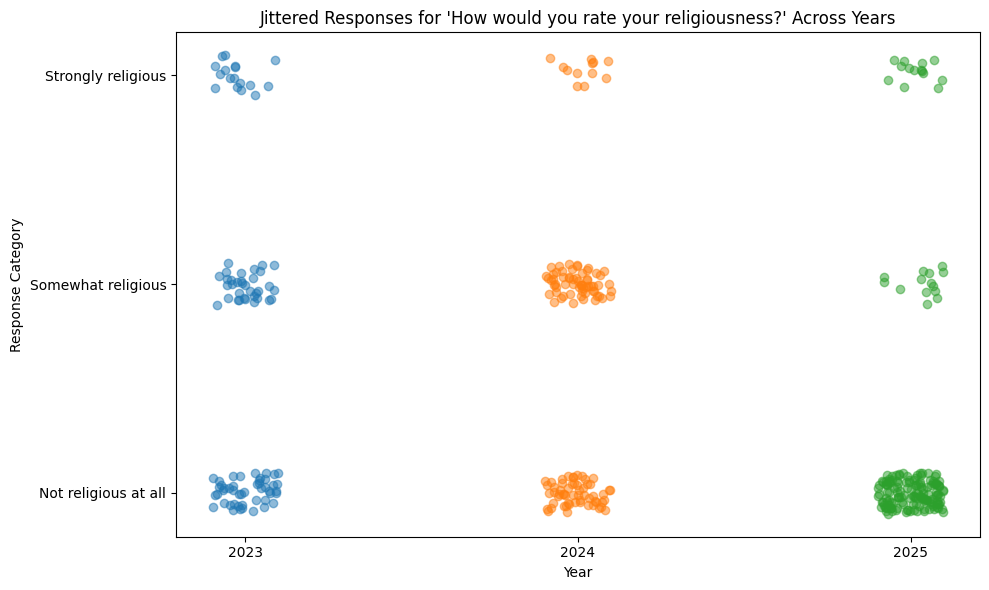

In [92]:
print("Merging spirituality and church and comparing them across time")
df_fall_2025["How would you rate your religiousness?"] = df_fall_2025["Do you attend church?"].apply(lambda x: "Not religious at all" if x == "Never" else "Somewhat religious" if x == "Often" else "Strongly religious" if x == "Frequently" else x)
df_max_fall_2023["How would you rate your religiousness?"] = df_max_fall_2023["How would you rate your religiousness / spirituality?"].apply(lambda x: "Not religious at all" if x == "Not spiritual at all" else "Somewhat religious" if x == "Somewhat spiritual" else "Strongly religious" if x == "Strongly spiritual" else x)

col = "How would you rate your religiousness?"
ordered_categories = ['Not religious at all', 'Somewhat religious', 'Strongly religious']
mapping = {cat: i for i, cat in enumerate(ordered_categories)}
codes_2023 = df_max_fall_2023[col].dropna().map(mapping).dropna()
codes_2024 = df_fall_2024[col].dropna().map(mapping).dropna()
codes_2025 = df_fall_2025[col].dropna().map(mapping).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    np.ones(len(codes_2023)) * 2023 + np.random.uniform(-0.1, 0.1, len(codes_2023)), 
    codes_2023 + np.random.uniform(-0.1, 0.1, len(codes_2023)), 
    alpha=0.5, label='2023'
)
plt.scatter(
    np.ones(len(codes_2024)) * 2024 + np.random.uniform(-0.1, 0.1, len(codes_2024)), 
    codes_2024 + np.random.uniform(-0.1, 0.1, len(codes_2024)), 
    alpha=0.5, label='2024'
)
plt.scatter(
    np.ones(len(codes_2025)) * 2025 + np.random.uniform(-0.1, 0.1, len(codes_2025)), 
    codes_2025 + np.random.uniform(-0.1, 0.1, len(codes_2025)), 
    alpha=0.5, label='2025'
)
plt.yticks(range(len(ordered_categories)), ordered_categories)
plt.title(f"Jittered Responses for '{col}' Across Years")
plt.xlabel("Year")
plt.xticks([2023, 2024, 2025])
plt.ylabel("Response Category")
plt.tight_layout()
plt.show()